### Linear vs Ridge vs LASSO

**Linear Regression ->** Minimizing Ordinary Least Square. That is we try to minimize the value of L in $L=\Sigma(y - y^`)^2$ where $y$ and $y^`$are observed and predited values. 

**Ridge Regression  ->** Minimizing OLS with L2 Regularization, addresses overfitting, penaizing high valued coefficients. In this case we minimize the value of L ($L=\Sigma(y - y^`)^2+\lambda\Sigma\beta^2$) where $\beta$ are the values of coefficients and $\lambda$ is regularization or tuning parameter. 

**LASSO Regression  ->** Minimizing OLS with L1 Regularization, addresses overfitting, penalizing high valued coefficients. Similar to Ridge Regression, except here L is ($L=\Sigma(y - y^`)^2+\lambda\Sigma|\beta|$) 

The only difference from Ridge regression is that the regularization term is in absolute value.
LASSO method also punishes high values of coefficients but it may also set them to zero if they are not relevant. In the case of Ridge regression, we try to minimize to values of coefficients but never set them to zero.

In genereal $L_n$ regulariation means value of $\beta$ raised to the power n. n =2 means L2 regularization.


**LASSO->** Least Absolute Shrinkage and Selection Operator

### Linear Regression - A Simple Example

[ 3.74540119  9.50714306  7.31993942  5.98658484]


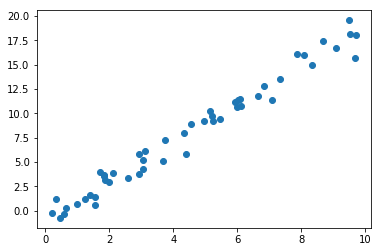

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);
print(x[:4])

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
X = x[:, np.newaxis]
model.fit(X, y)
model.coef_, model.intercept_, model.rank_

(array([ 1.9776566]), -0.90331072553111635, 1)

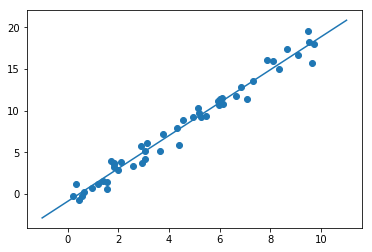

In [5]:
xfit = np.linspace(-1, 11) #test data
Xfit = xfit[:, np.newaxis] #test data converted to 2D array
yfit = model.predict(Xfit) #applying learned model to test data
plt.scatter(x, y)          #plot for original data
plt.plot(xfit, yfit);      #plot for test data

### Polynomial Regression

In [1]:
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

 Let's make a 7th-degree polynomial model in this way:

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

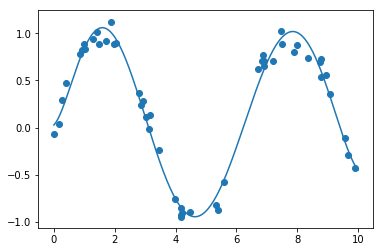

In [5]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Linear Regression on Boston Data

In [6]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
features = data.data
features[:,0][:7]

array([ 0.00632,  0.02731,  0.02729,  0.03237,  0.06905,  0.02985,  0.08829])

In [8]:
%matplotlib inline
n = 13
import matplotlib.pyplot as plt
import pandas as pd
df =  pd.DataFrame(features)
df.columns = data.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


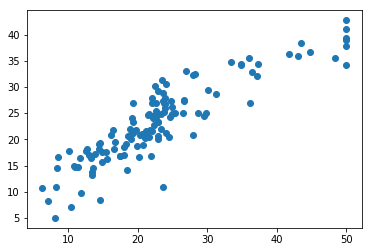

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df,data.target, random_state=1)

model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)

plt.scatter(ytest, y_predict)

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,y_predict)

21.889369432473622

#### Ridge Regression on Boston Data

In [12]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = .2)
model

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

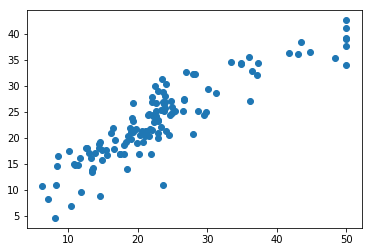

In [13]:
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)
plt.scatter(ytest, y_predict)

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,y_predict)

21.635122967943541

#### LASSO Regression

In [15]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = .01)
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)
mean_squared_error(ytest,y_predict)

21.6954845514487

In [16]:
model.dual_gap_

array(2.848715856705894)